# Regresión en Scikit-Learn

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from semana2_datos import *

## Dataset

Cargamos los cuatro conjuntos de datos como arreglos `numpy`. Los datos _reales_ corresponden a mediciones verificadas con algún instrumento. En la práctica esto no se realiza frecuentemente, por lo que es necesario usar estadística para realizar predicciones.

Obsérvese que a las `X`'s se les añade una columna con unos dado que asumimos $x_0 \equiv 1$. Esto con el fin de hacer regresión lineal más adelante.

In [2]:
X_1 = np.array([[1,x] for x, y in data_1])
Y_1 = np.array([y for x, y in data_1])

X_2 = np.array([[1,x] for x, y in data_2])
Y_2 = np.array([y for x, y in data_2])

X_3 = np.array([[1,x] for x, y in data_3])
Y_3 = np.array([y for x, y in data_3])

X_4 = np.array([[1,x] for x, y in data_4])
Y_4 = np.array([y for x, y in data_4])

X_real = np.array([[1,x] for x, y in data_real])
Y_real = np.array([y for x, y in data_real])

## Gráficos

Ejercicios:
- Graficar `data_2`.
- Graficar `data_3` y `data_4` en un mismo plano y con distinto color.

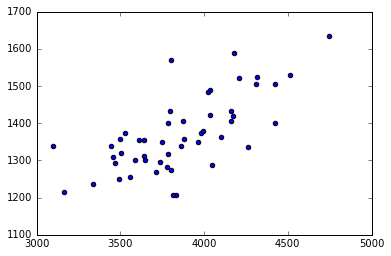

In [3]:
# data_1
x_1 = np.array([x for _, x in X_1])
plt.scatter(x_1, Y_1)

## Modelo a partir de la ecuación normal de mínimos cuadrados

$$W = (X^T X)^{-1} X^T Y$$

In [6]:
# data_1
W_1 = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_1.T,
                                                  X_1)), X_1.T), Y_1)
f1 = lambda X: W_1[1]*X + W_1[0]
print('Los pesos aprendidos son\nw0: {}\nw1: {}'.format(W_1[0], W_1[1]))

Los pesos aprendidos son
w0: 585.7518494547396
w1: 0.2036782666676823


Ahora, graficamos la recta contra los datos de entrenamiento

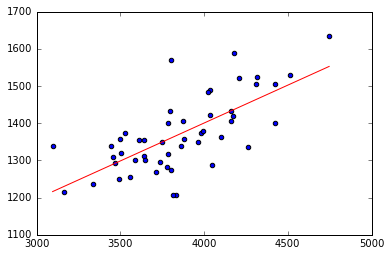

In [5]:
# data_1
plt.scatter(x_1, Y_1)
lower = min(x_1)
upper = max(x_1)
sample_x1 = np.linspace(lower, upper, num=len(x_1))
plt.plot(sample_x1, f1(sample_x1), color='r')

Ejercicios:

- Ajustar un regresor lineal para `data_2`, `data_3` y `data_4` usando el módulo correspondiente de Scikit-Learn.
- Graficar las rectas contra sus respectivos conjuntos de datos. `data_3` y `data_4` deberán de aparecer en el mismo plano con distinción de color.

## Regresión polinómica y regularizaciones

In [7]:
# Polynomial regression
x_1 = np.expand_dims(x_1, axis=1)
poly = PolynomialFeatures(3)
features = poly.fit_transform(x_1)

In [8]:
features.shape

(50, 4)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(features, Y_1)

/Users/alorozco53/anaconda3/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
sample_x1 = np.expand_dims(sample_x1, axis=1)

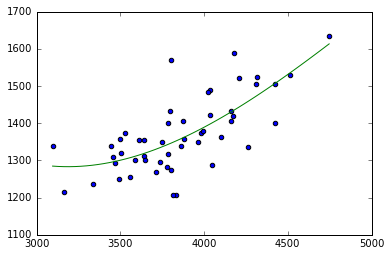

In [11]:
sample_x1_poly = poly.fit_transform(sample_x1)
y1_poly = lin_reg.predict(sample_x1_poly)
plt.scatter(x_1, Y_1)
plt.plot(sample_x1, y1_poly, color='g')

## Regularizadores

In [12]:
# Ridge para x_1
ridge = Ridge(alpha=2.5)
ridge.fit(features, Y_1)

Ridge(alpha=2.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

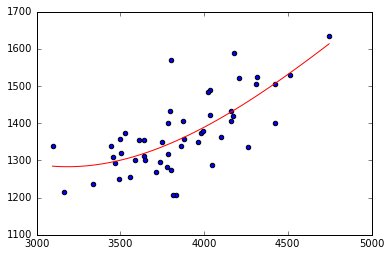

In [13]:
y1_ridge = ridge.predict(sample_x1_poly)
plt.scatter(x_1, Y_1)
plt.plot(sample_x1, y1_ridge, color='r')

## Varianza esperada y sesgo esperado

In [14]:
# Expected prediction
def E(f_x):
    return float(sum(f_x)) / float(len(f_x))

In [15]:
x_real = np.array([x for _, x in X_real])
exp_pred_1 = E(f1(x_real))
avg_y_real = E(Y_real)
avg_y_real - exp_pred_1

-80.4679332671908

## Varianza y sesgo

In [ ]:
# data 1
f1 = W_1[1]*sample_x1 + W_1[0]
f1_to_2 = f1 ** 2
E11 = E(f1_to_2)
E_f1 = E(f1)
E12 = E_f1 ** 2

In [ ]:
E11 - E12